In [1]:
import time
import datetime
import requests
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import sqlite3 as lite
import collections
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cities = {"Austin":'30.303936,-97.754355',
          "Boston":'42.331960,-71.020173',
          "Chicago":'41.837551,-87.681844',
          "Denver":'39.761850,-104.881105',
          "New_Orleans":'30.053420,-89.934502',
          "New_York":'40.663619,-73.938589',
          "Philadelphia":'40.009376,-75.133346',
          "Buffalo":'42.8864, -78.8784'
}

In [3]:
api_key = 'ccac8a4b658f4a6e2b0c9f0791e8e4ab/'
url = 'https://api.forecast.io/forecast/'
austin = cities['Austin']

In [4]:
now = datetime.datetime.now()
start_date = now - datetime.timedelta(days=30)

In [5]:
con = lite.connect('weather.db')
cur = con.cursor()

In [6]:
cities.keys()

['New_York',
 'Buffalo',
 'New_Orleans',
 'Chicago',
 'Boston',
 'Austin',
 'Philadelphia',
 'Denver']

In [77]:
with con:
    cur.execute('DROP TABLE IF EXISTS daily_temp')
    cur.execute('CREATE TABLE daily_temp ( day_of_reading INT, New_Orleans REAL, Buffalo REAL, Chicago REAL, Boston REAL, New_York REAL, Austin REAL, Philadelphia REAL, Denver REAL);')

In [80]:
with con:
    while start_date < now:
        cur.execute('INSERT INTO daily_temp(day_of_reading) VALUES (?)', (int(start_date.strftime('%s')),))
        start_date += datetime.timedelta(days=1)
    cur.execute('SELECT * FROM daily_temp')
    rows = cur.fetchall()
    cols = [desc[0] for desc in cur.description]
    df_test = pd.DataFrame(rows,columns=cols)
df_test

,day_of_reading,New_Orleans,Buffalo,Chicago,Boston,New_York,Austin,Philadelphia,Denver
0,1465920290,None,None,None,None,None,None,None,None
1,1466006690,None,None,None,None,None,None,None,None
2,1466093090,None,None,None,None,None,None,None,None
3,1466179490,None,None,None,None,None,None,None,None
4,1466265890,None,None,None,None,None,None,None,None
5,1466352290,None,None,None,None,None,None,None,None
6,1466438690,None,None,None,None,None,None,None,None
7,1466525090,None,None,None,None,None,None,None,None
8,1466611490,None,None,None,None,None,None,None,None
9,1466697890,None,None,None,None,None,None,None,None


In [81]:
for k,v in cities.iteritems():
    start_date = now - datetime.timedelta(days=30)
    while start_date != now:
        r = requests.get(url + 
                         api_key + 
                         v + ',' + 
                         start_date.strftime('%Y-%m-%dT%I:%M:%S'))
        
        with con:
            cur.execute('UPDATE daily_temp SET ' 
                        + k + ' = ' 
                        + str(r.json()['daily']['data'][0]['temperatureMax']) + 
                        ' WHERE day_of_reading = ' + start_date.strftime('%s'))
        start_date += datetime.timedelta(days=1)
con.close()

In [6]:
con = lite.connect('weather.db')
cur = con.cursor()

In [8]:
with con:
    cur.execute('SELECT * FROM daily_temp')
    rows = cur.fetchall()
    cols = [desc[0] for desc in cur.description]
    df_test = pd.DataFrame(rows,columns=cols)
df_test

,day_of_reading,New_Orleans,Buffalo,Chicago,Boston,New_York,Austin,Philadelphia,Denver
0,1465920290,85.74,71.34,81.61,75.98,77.89,92.20,77.76,79.83
1,1466006690,90.13,78.18,87.54,81.91,80.99,95.17,80.84,87.14
2,1466093090,92.16,80.98,82.77,75.26,73.69,95.46,70.67,90.11
3,1466179490,91.99,83.95,77.89,72.85,73.30,95.05,82.08,84.16
4,1466265890,83.63,71.99,81.25,71.13,80.25,94.98,84.93,89.31
5,1466352290,85.01,75.47,89.73,79.13,77.74,93.39,91.11,95.37
6,1466438690,87.16,85.03,91.74,81.15,77.59,94.59,90.30,72.39
7,1466525090,87.71,75.69,81.38,84.43,86.57,95.53,86.50,96.47
8,1466611490,89.10,74.71,75.11,76.40,86.38,93.87,84.61,76.04
9,1466697890,91.80,74.03,74.66,75.00,79.16,92.69,84.48,89.54


In [10]:
r.json()['daily'].keys()

NameError: name 'r' is not defined

In [9]:
daily = r.json()['daily']['data'][0]#['temperatureMax']
daily

NameError: name 'r' is not defined

In [7]:
df = pd.read_sql_query('SELECT * FROM daily_temp ORDER BY day_of_reading',con,index_col='day_of_reading')
df

,New_Orleans,Buffalo,Chicago,Boston,New_York,Austin,Philadelphia,Denver
day_of_reading,,,,,,,,
1465920290,85.74,71.34,81.61,75.98,77.89,92.20,77.76,79.83
1466006690,90.13,78.18,87.54,81.91,80.99,95.17,80.84,87.14
1466093090,92.16,80.98,82.77,75.26,73.69,95.46,70.67,90.11
1466179490,91.99,83.95,77.89,72.85,73.30,95.05,82.08,84.16
1466265890,83.63,71.99,81.25,71.13,80.25,94.98,84.93,89.31
1466352290,85.01,75.47,89.73,79.13,77.74,93.39,91.11,95.37
1466438690,87.16,85.03,91.74,81.15,77.59,94.59,90.30,72.39
1466525090,87.71,75.69,81.38,84.43,86.57,95.53,86.50,96.47
1466611490,89.10,74.71,75.11,76.40,86.38,93.87,84.61,76.04


In [17]:
day_change = collections.defaultdict(int)
for col in df.columns:
    city_vals = df[col].tolist() # change each column into a list
    city_id = col
    city_change = [] #Create an empty list
    for k,v in enumerate(city_vals):
        if k < len(city_vals) - 1:
            city_change.append(abs(city_vals[k] - city_vals[k+1]))
    day_change[city_id] = city_change #Populate day_change
day_change

defaultdict(int,
            {'Austin': [2.9699999999999989,
              0.28999999999999204,
              0.40999999999999659,
              0.069999999999993179,
              1.5900000000000034,
              1.2000000000000028,
              0.93999999999999773,
              1.6599999999999966,
              1.1800000000000068,
              1.3799999999999955,
              4.1800000000000068,
              6.6600000000000108,
              0.93999999999999773,
              3.2800000000000011,
              3.7800000000000011,
              0.34000000000000341,
              0.46999999999999886,
              1.1899999999999977,
              1.3200000000000074,
              1.3799999999999955,
              0.18999999999999773,
              0.67000000000000171,
              0.07000000000000739,
              0.48000000000000398,
              0.23000000000000398,
              1.2000000000000028,
              1.9900000000000091,
              1.0499999999999972,
        

In [80]:
city_var = []
city_std = []
df_changes = pd.DataFrame(columns=day_change.keys())

for col in df_changes.columns:
    df_changes[col] = day_change[col]
    city_var.append(df_changes[col].var())
    
    city_std.append(df_changes[col].std())
#     max_var = max(city_var)
    max_var = max(df_changes[col].var())
    max_std = max(city_std)
        
# city_var
max_var
# df_changes

# max_city
# print 'The city with the highest variance is ' +  + 'with variance=' + max_var

TypeError: 'float' object is not iterable

In [48]:
stats_change = []
for city in df_changes.columns:
    stats_change.append((city,
                        df_changes[city].var(),
                        df_changes[city].std()))
    
stats_change

[('New_York', 12.707624876847287, 3.564775571736219),
 ('Buffalo', 9.682648029556663, 3.111695362588803),
 ('Chicago', 14.886424137931028, 3.858292904631662),
 ('Boston', 11.497344827586206, 3.390773485148515),
 ('Philadelphia', 11.120521428571434, 3.3347445822088737),
 ('Denver', 43.51638522167485, 6.596695022636324),
 ('New_Orleans', 2.865086206896556, 1.6926565531425908),
 ('Austin', 2.1479741379310413, 1.4655968538213506)]

In [60]:
df_changes_stats = pd.DataFrame(index=df_changes.columns,
                                columns=['Variance','Std'])
# for city in df_changes_stats.index:
#     df_changes_stats['Variance'] = stats_change[:][1]

df_changes_stats

,Variance,Std
New_York,NaN,NaN
Buffalo,NaN,NaN
Chicago,NaN,NaN
Boston,NaN,NaN
Philadelphia,NaN,NaN
Denver,NaN,NaN
New_Orleans,NaN,NaN
Austin,NaN,NaN


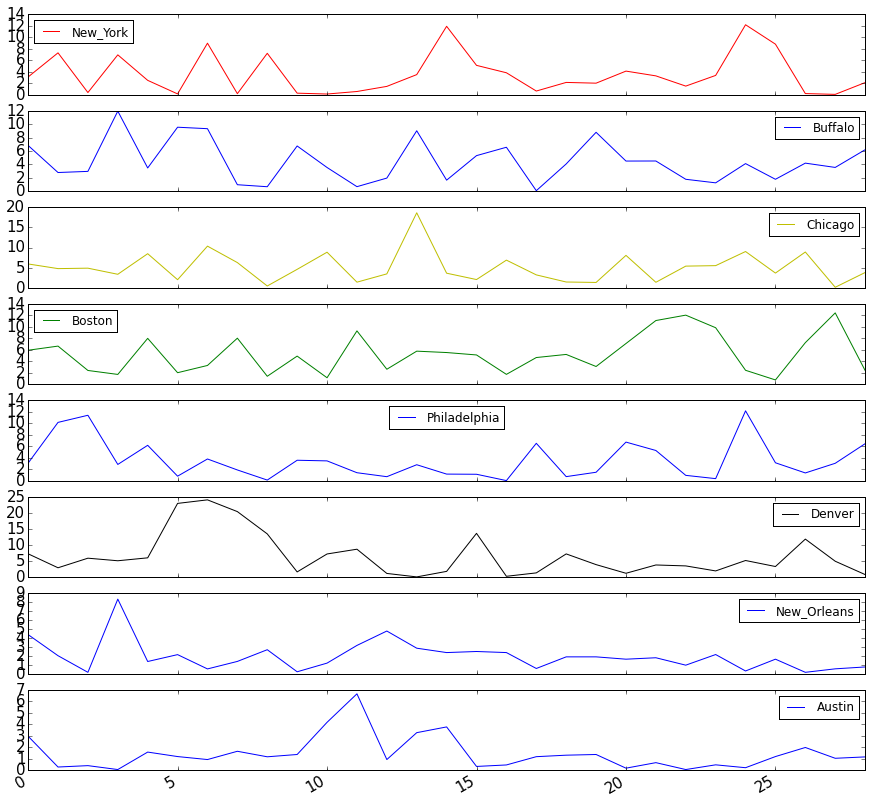

In [34]:
fig = df_changes.plot(kind='line',
              subplots=True,
              figsize=(15,15),
              fontsize=15,
              style=['r','b','y','g','b','k','b','b'])
fig;

In [25]:
attributes = pd.DataFrame(index=df.columns,
                          columns=['max_temps',
                                   'min_temps',
                                   'range',
                                   'variance',
                                   'mean'])
attributes.head()

,max_temps,min_temps,range,variance,mean
New_Orleans,NaN,NaN,NaN,NaN,NaN
Buffalo,NaN,NaN,NaN,NaN,NaN
Chicago,NaN,NaN,NaN,NaN,NaN
Boston,NaN,NaN,NaN,NaN,NaN
New_York,NaN,NaN,NaN,NaN,NaN


In [27]:
i = 0
for city in attributes.index:
    attributes.loc[city,'max_temps'] = max(df[city])
    attributes.loc[city,'min_temps'] = min(df[city])
    attributes.loc[city,'range'] = max(df[city]) - min(df[city])
    attributes.loc[city,'variance'] = df[city].var()
    attributes.loc[city,'mean'] = df[city].mean()
    i +=1

attributes

,max_temps,min_temps,range,variance,mean
New_Orleans,95.95,83.63,12.32,7.056722,89.34567
Buffalo,86.47,71.12,15.35,23.24237,78.757
Chicago,91.74,70.31,21.43,37.46713,81.481
Boston,87.17,62.84,24.33,40.11695,76.796
New_York,87.93,70.86,17.07,17.61926,79.85
Austin,98.01,87.13,10.88,4.824127,94.871
Philadelphia,92.24,70.67,21.57,22.61401,83.90167
Denver,97.06,72.39,24.67,42.55226,86.4


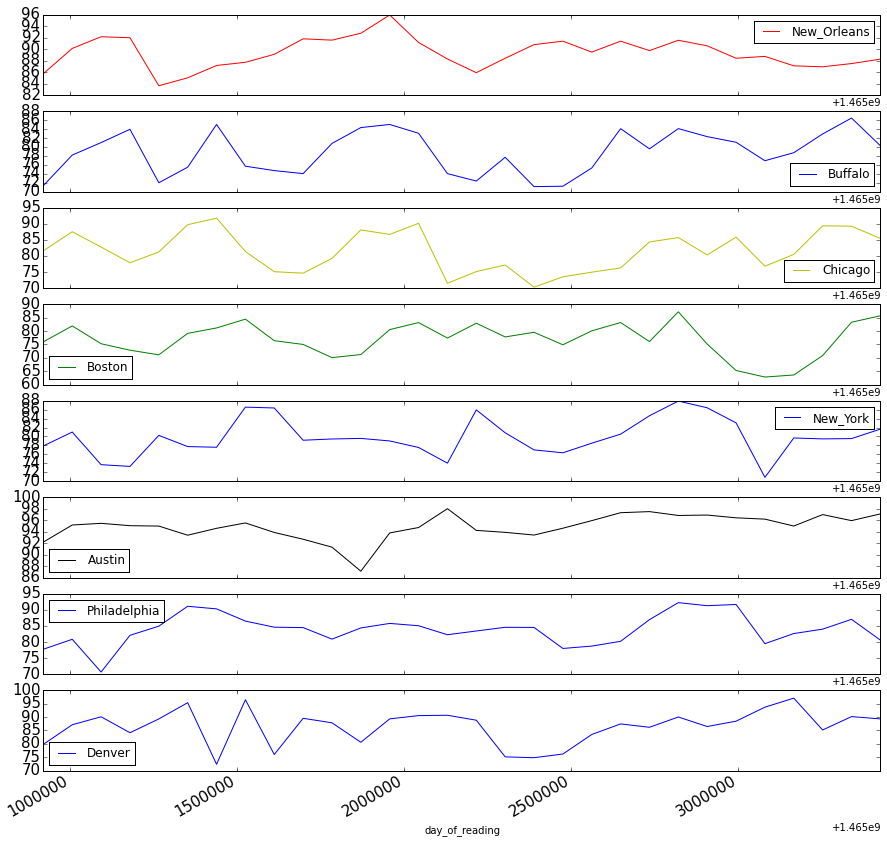

In [12]:
fig = df.plot(kind='line',
              subplots=True,
              figsize=(15,15),
              fontsize=15,
              style=['r','b','y','g','b','k','b','b'])
fig;

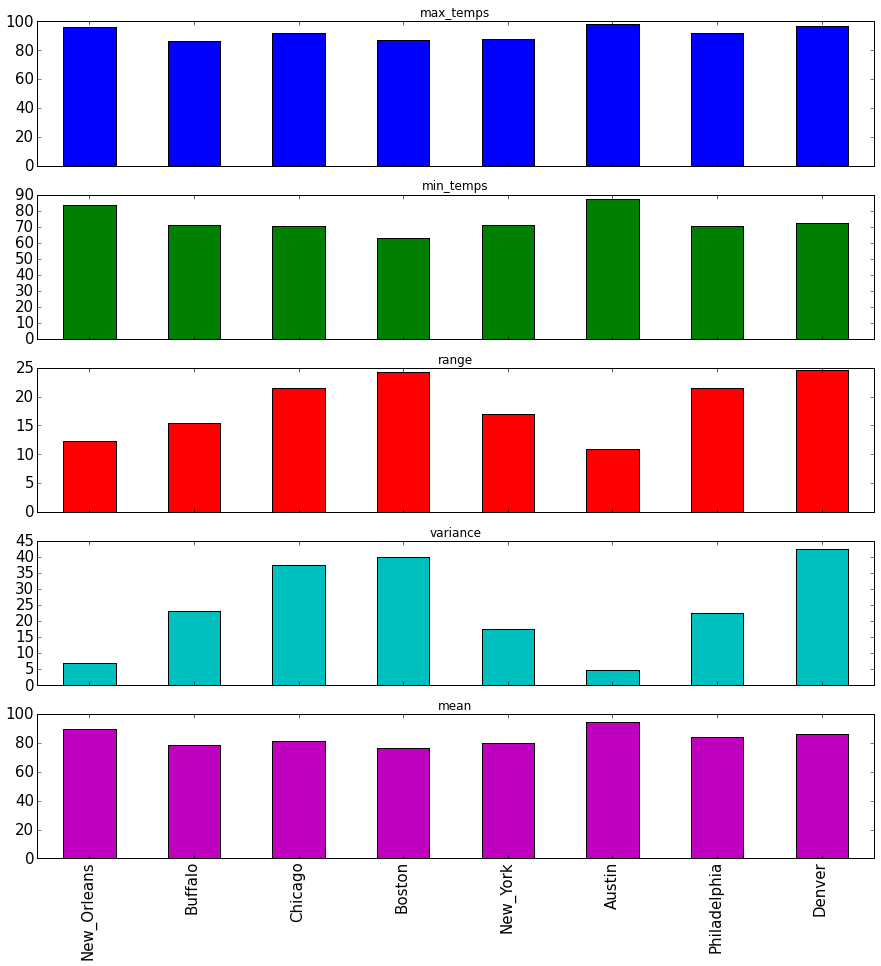

In [49]:
fig = attributes.plot(kind='bar',
              subplots=True,
              figsize=(15,15),
              fontsize=15,
              style=['r','b','y','g','b','k','b','b'],
              legend=False)
fig;